
# TAREA 1 — Discrete Time Signal Operations

**Fecha:** 2026-02-16  
**Tema (clase de hoy):** Operaciones en señales en tiempo discreto (DT)

> Entrega: **un solo notebook** con tus soluciones y gráficas.



## Relación con **Serie 1 (ejercicios en papel)**

Esta tarea es la **extensión computacional** de la Serie 1.

**Flujo recomendado (por ejercicio):**
1) Resuelve **en papel** (análisis / fórmulas / razonamiento).
2) Implementa aquí para **verificar** con código y gráficas.
3) Si hay contradicción: **debug** hasta entender el error (en el papel o en el código).

### Mapeo rápido (Serie 1 → Notebook)

- **Serie 1 #4** (u[n], δ[n], r[n]) → **Notebook Ejercicio 1**
- **Serie 1 #2** (periodicidad de cos) → **Notebook Ejercicio 2**
- **Serie 1 #5–7** (inversión y corrimientos) → **Notebook Ejercicio 3**
- **Serie 1 #11** (media y RMS) → **Notebook Ejercicio 4**
- **Serie 1 #9** (energía de (0.9)^n u[n]) → **Notebook Ejercicio 5**
- **Serie 1 #12** (auto/cross correlación) → **Notebook Ejercicio 6**



## Reglas (importantes)

- Puedes usar ChatGPT (u otra IA) **solo como verificador**.
- Tu notebook debe incluir tu razonamiento (comentarios) y tu código.
- **No uses atajos** que oculten la idea:
  - `np.roll`, `np.flip`, `x[::-1]` (para inversión), `np.convolve`, `np.correlate`
- Sí puedes usar NumPy básico, `for` loops, y operaciones elementales.

**Pista:** Si tu solución cabe en 1 línea usando una función “mágica”, probablemente no cuenta.


**Clave:** La IA NO sustituye el papel. Úsala para *verificar* y para detectar errores, igual que usarías una calculadora.



## 1) Datos del estudiante

Completa esta celda y vuelve a correrla.


In [ ]:

# === Datos del estudiante ===
NOMBRES = "Pozos Hernández Angel, Silverio Martínez Andrés"
GRUPO = "4"

print("Nombres:", NOMBRES)
print("Grupo:", GRUPO)


Nombres: Pozos Hernández Angel, Silverio Martínez Andrés
Grupo: 4



## 2) Imports y configuración (no modificar)

Esta sección es scaffolding para que no pierdas tiempo con formato de gráficas.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7, 3)
plt.rcParams["axes.grid"] = True
np.set_printoptions(precision=4, suppress=True)



## 3) (Opcional) Subir foto de tu libreta / sketch

Si dibujas a mano alguna señal, puedes subirla aquí como evidencia.


In [ ]:

# (Opcional) En Colab:
# from google.colab import files
# uploaded = files.upload()

# (Opcional) Mostrar una imagen subida (si aplica):
# from PIL import Image
# import io
# fname = list(uploaded.keys())[0]
# img = Image.open(io.BytesIO(uploaded[fname]))
# plt.figure(figsize=(6,4))
# plt.imshow(img); plt.axis("off"); plt.title(fname)
# plt.show()



## 4) Funciones de graficación (scaffold)

Usa estas funciones para graficar de forma consistente.


In [ ]:

def stem_plot(n, x, title="", xlabel="n", ylabel="x[n]"):
    """Discrete-time stem plot."""
    n = np.asarray(n)
    x = np.asarray(x)
    markerline, stemlines, baseline = plt.stem(n, x, use_line_collection=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def compare_stem(n, x1, x2, label1="x1", label2="x2", title=""):
    """Compare two discrete-time signals on the same axes."""
    n = np.asarray(n)
    x1 = np.asarray(x1); x2 = np.asarray(x2)
    plt.stem(n, x1, use_line_collection=True)
    plt.stem(n, x2, use_line_collection=True)
    plt.title(title)
    plt.xlabel("n")
    plt.ylabel("amplitud")
    plt.legend([label1, label2])
    plt.grid(True)
    plt.show()



## 5) Funciones que debes implementar (TODO)

Implementa **sin** usar atajos (`np.roll`, `np.flip`, slicing invertido, etc.).


In [ ]:

def time_reverse(x):
    """Return x_rev[n] = x[-n] assuming x is indexed on n=0..N-1 (finite-length)."""
    # TODO: implement using loops / indexing
    N = len(x)
    xReves = np.zeros(N, dtype=float)

    for i in range(N):
      xReves[i] = x[N-1-i]
    return xReves

def time_shift(x, k, pad_value=0.0):
    """Return x_shift[n] = x[n-k]. Positive k shifts RIGHT (delay)."""
    # TODO: implement with explicit padding
    N = len(x)
    xCambio = np.full(N, pad_value, dtype=float)

    for i in range(N):
      if 0 <= i-k < N:
        xCambio[i] = x[i-k]
    return xCambio

def energy(x):
    """E = sum |x[n]|^2 for the available samples."""
    # TODO
    E = 0.0

    for valor in x:
      E += valor**2
    return E

def mean_value(x):
    """Mean over available samples."""
    # TODO
    suma = 0.0

    for valor in x:
      suma += valor
    return suma/len(x)

def rms(x):
    """RMS over available samples."""
    return np.sqrt(mean_value(x**2))

def autocorr(x):
    """Autocorrelation for lags k = -(N-1)..(N-1)."""
    N = len(x)
    kValor = np.arange(-(N-1), N)
    rxx = np.zeros(len(kValor), dtype=float)

    for i, k in enumerate(kValor):
        suma = 0.0
        for n in range(N):
            if 0 <= n - k < N:
                suma += x[n] * x[n - k]
        rxx[i] = suma

    return kValor, rxx

def crosscorr(x, y):
    """Cross-correlation r_xy[k] for lags k = -(N-1)..(N-1). Return (k_vals, rxy)."""
    # TODO (no np.correlate)
    N = len(x)
    kValor = np.arange(-(N-1), N)
    rxy = np.zeros(len(kValor), dtype=float)

    for i, k in enumerate(kValor):
      suma = 0.0
      for n in range(N):
        if 0 <= n-k < N:
          suma += x[n]*y[n-k]
        rxy[i] = suma
    return kValor, rxy



## 6) Ejercicios

En cada ejercicio:
1) escribe tu razonamiento en comentarios,
2) implementa,
3) grafica y verifica visualmente.



### Ejercicio 1 — Señales básicas

Para **-5 ≤ n ≤ 5**, construye y grafica:
- a) u[n]
- b) δ[n]
- c) r[n] = n u[n]

**TODO:** crea `n`, `u`, `delta`, `r` y grafícalas con `stem_plot`.


📌 Conecta con **Serie 1 #4** (u[n], δ[n], r[n]).

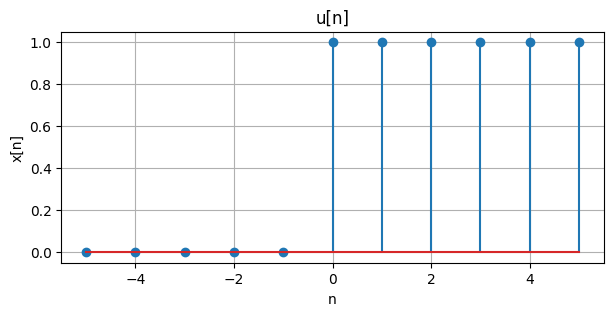

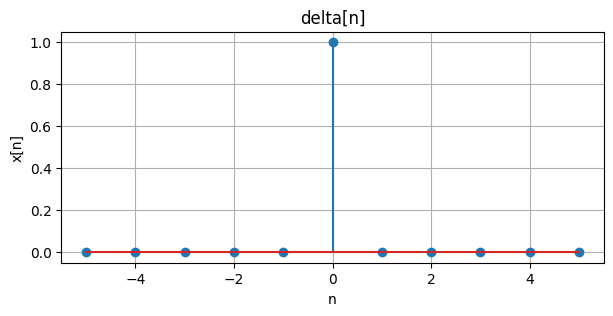

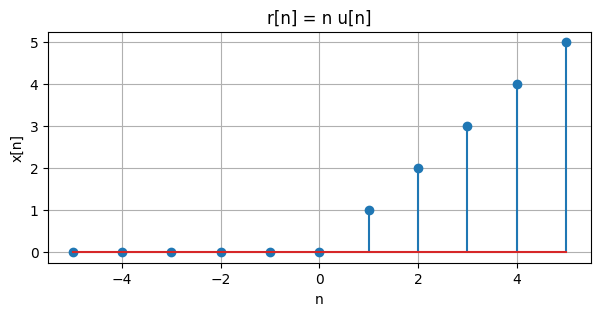

In [ ]:
# Para armar estas señales desde cero nos basamos en sus definiciones matemáticas
# puras. Para el escalón unitario u[n], simplemente le asignamos un 1 a todas las
# posiciones donde n >= 0 y 0 a las demás. Para el impulso delta[n], la
# condición es más estricta: solo vale 1 exactamente en n = 0. Finalmente,
# para sacar la rampa r[n], en lugar de hacer otro ciclo desde cero, aprovechamos
# que ya teníamos hecho el escalón y solo lo multiplicamos por el vector de tiempo n.
# Así nos aseguro de que solo crezca en la parte positiva.

def stem_plot(n, x, title="", xlabel="n", ylabel="x[n]"):
    """Discrete-time stem plot."""
    n = np.asarray(n)
    x = np.asarray(x)
    # Quitamos use_line_collection=True
    markerline, stemlines, baseline = plt.stem(n, x)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def compare_stem(n, x1, x2, label1="x1", label2="x2", title=""):
    """Compare two discrete-time signals on the same axes."""
    n = np.asarray(n)
    x1 = np.asarray(x1); x2 = np.asarray(x2)
    # Quitamos use_line_collection=True
    plt.stem(n, x1)
    plt.stem(n, x2)
    plt.title(title)
    plt.xlabel("n")
    plt.ylabel("amplitud")
    plt.legend([label1, label2])
    plt.grid(True)
    plt.show()

n = np.arange(-5, 6)

# u[n]: 1 si n >= 0, 0 sera en otro caso
u = np.array([1.0 if valor >= 0 else 0.0 for valor in n])

# δ[n]: Donde 1 si n == 0, en otro caso será 0
delta = np.array([1.0 if valor == 0 else 0.0 for valor in n])

# r[n] = n u[n]
r = n*u

# Graficar
stem_plot(n, u, title="u[n]")
stem_plot(n, delta, title="delta[n]")
stem_plot(n, r, title="r[n] = n u[n]")



### Ejercicio 2 — Periodicidad de x[n] = cos((5π/6)n)

1) Determina si es periódica.  
2) Si lo es, encuentra su **periodo fundamental** N0.

**TODO:** explica en texto (markdown o comentarios) y verifica con una gráfica de varios periodos.


📌 Conecta con **Serie 1 #2** (periodicidad de cos(·)).

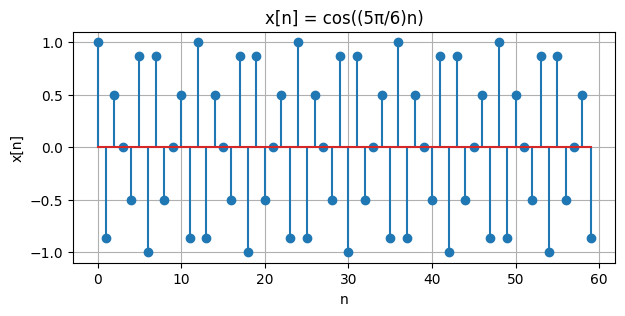

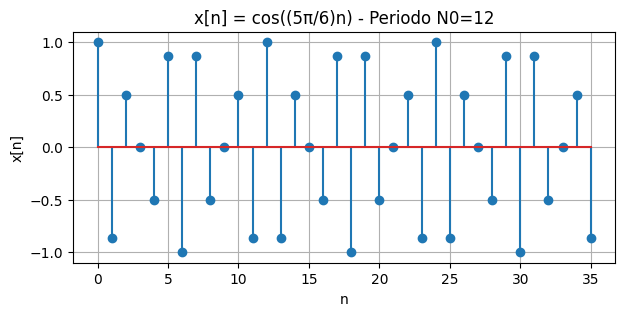

In [ ]:

# TODO: razonamiento aquí (comentarios)
# Para que una señal discreta x[n] = cos([w_0]n) sea periódica, su frecuencia
# angular [w_0] debe ser múltiplo racional de 2pi, o sea, debe de cumplir con
# la relación ([w_0]/2pi) = (m/[N_0]), donde m y [N_0] son números enteros.
# [N_0] será el periodo fundamental
#
# La frecuencia angular de la señal en este punto es de [w_0] = [([5pi]/6)],
# donde al sustituir y responder, se obtienen los valores de m = 5 y [N_0] = 12
# Confirmando que la señal si es periodica, teniendo un periodo fundamental de
# 12 muestras

# Verificación numérica (opcional):
n = np.arange(0, 60)
x = np.cos((5*np.pi/6)*n)
stem_plot(n, x, title="x[n] = cos((5π/6)n)")

# Aqui, se graficaron 36 muestras (3 periodos completos de 12) para que la
# periodicidad se vea mejor
n = np.arange(0, 36)
x = np.cos((5 * np.pi / 6) * n)
stem_plot(n, x, title="x[n] = cos((5π/6)n) - Periodo N0=12")


### Ejercicio 3 — Transformaciones en una secuencia finita

Dada: **x[n] = {1,2,3,4}** para n = 0,1,2,3

Calcula y grafica:
- a) x[-n]
- b) x[n-2]
- c) x[n+1]
- d) x[-n+2]
- e) x[3-n]

**Nota:** Define claramente tu eje n para cada resultado (con padding si hace falta).


📌 Conecta con **Serie 1 #5–7** (x[-n], x[n±k], composiciones).

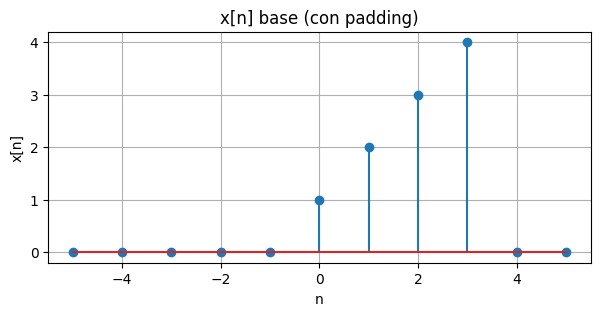

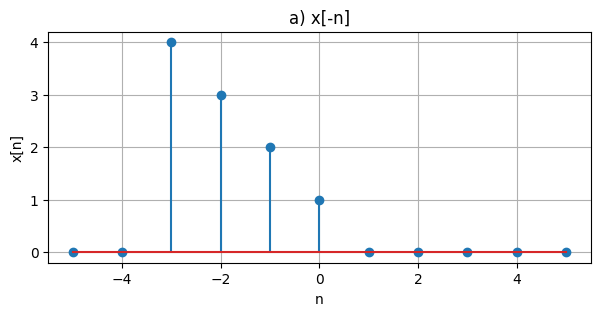

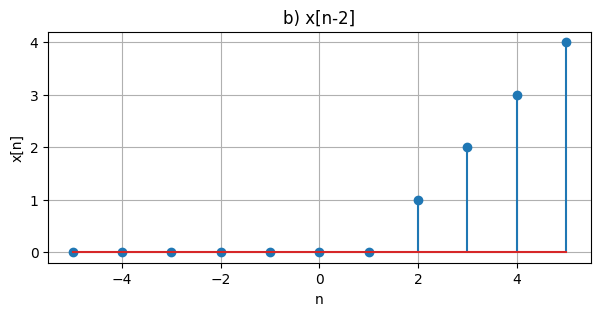

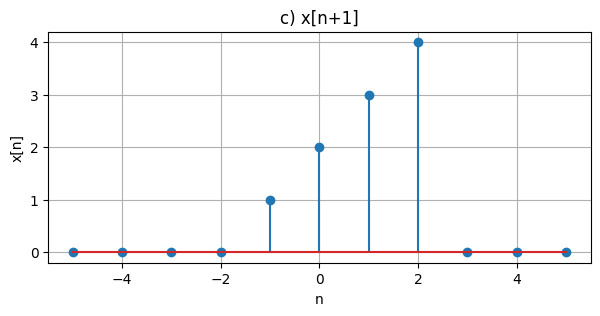

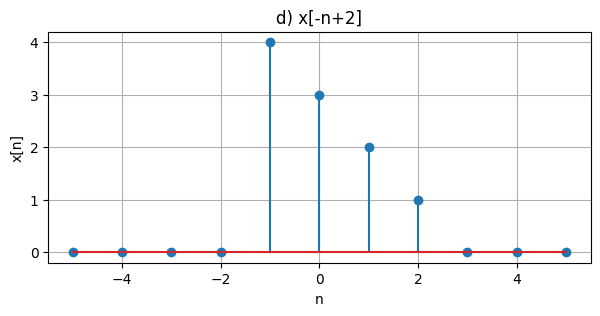

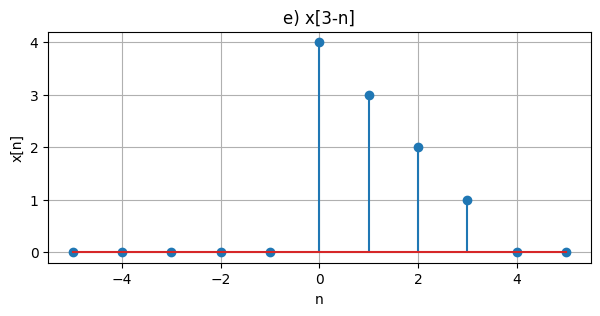

In [ ]:

# Aqui se modificaron un poco los valores para poder apreciar de mejor forma
# las operaciones a realizar, para ello se definieron los valores en cada
# parte de nuestro arreglo.

# 1. Creamos un eje n amplio (padding) de -5 a 5 (11 muestras en total)
n = np.arange(-5, 6)
x = np.zeros(len(n))

# 2. Llenamos los valores x[n] = {1, 2, 3, 4} para n = 0, 1, 2, 3
# En nuestro arreglo n, el valor n=0 está en el índice 5
x[5] = 1.0
x[6] = 2.0
x[7] = 3.0
x[8] = 4.0

stem_plot(n, x, title="x[n] base (con padding)")

# a) x[-n]: Inversión en el tiempo
# Donde x[-n] es un reflejo como si se pusiera un espejo en el eje
# n=0. Ahora la señal existe de -3 a 0. En n=-3 la altura es 4 y baja hasta
# n=0 con altura 1.
x_a = time_reverse(x)
stem_plot(n, x_a, title="a) x[-n]")

# b) x[n-2]: Atraso (delay) de 2 muestras (movimiento a la derecha)
# Donde x[n-2] hará que toda la figura original se mueva 2 pasos a la derecha.
# Ahora empiezará en n=2 (altura 1) y termina en n=5 (altura 4).
x_b = time_shift(x, 2)
stem_plot(n, x_b, title="b) x[n-2]")

# c) x[n+1]: Adelanto de 1 muestra (movimiento a la izquierda)
# Donde x[n+1] moverá toda la figura original un lugar a la izquierda.
# Empieza en n=-1 y terminará en n=2
x_c = time_shift(x, -1)
stem_plot(n, x_c, title="c) x[n+1]")

# d) x[-n+2]: Por álgebra, esto es x[-(n-2)].
# Es decir, primero invertimos y luego atrasamos (shift) por 2.
# Donde x[-n+2] invertirá la figura original (como en espejo), y después,
# la recorrerá dos pasos a la derecha
x_d = time_shift(time_reverse(x), 2)
stem_plot(n, x_d, title="d) x[-n+2]")

# e) x[3-n]: Esto es x[-n+3] o x[-(n-3)].
# Primero invertimos y luego atrasamos (shift) por 3.
# Donde x[3-n] es igual que la anterior, pero con un paso más a la derecha.
# Queda exactamente sobre los índices n=0 a n=3, pero
# "de bajada" (4, 3, 2, 1).
x_e = time_shift(time_reverse(x), 3)
stem_plot(n, x_e, title="e) x[3-n]")



### Ejercicio 4 — Energía, media y RMS

Para x[n] = {2, -2, 2, -2} (n=0..3):

1) Calcula la **media**  
2) Calcula el **RMS**  
3) Interpreta: ¿media = 0 implica RMS = 0? (explica)

**TODO:** Implementa usando tus funciones `mean_value` y `rms`.


📌 Conecta con **Serie 1 #11** (media y RMS).

In [ ]:

x = np.array([2, -2, 2, -2], dtype=float)

# Donde, a continuación se calcula la media y el RMS de acuerdo a las funciones
# que implementamos desde un inicio
m = mean_value(x)
r = rms(x)
print("Media:", m)
print("RMS:", r)

# Donde no, que la media sea un valor de 0, no significa que también RMS sea 0,
# ya que la media solo nos dice si la señal está centrada en 0 o no, mientras
# que el RMS mide la magnitud promedio de la señal (potencia). Al elevar al
# cuadrado en el cálculo del RMS, los valores negativos se vuelven positivos,
# lo que demuestra que la señal sí tiene amplitud y energía oscilatoria, aunque
# su promedio neto sea cero.

Media: 0.0
RMS: 2.0



### Ejercicio 5 — Energía (señal exponencial DT truncada)

Define una señal finita:
x[n] = (0.9)^n u[n]  para n = 0..30

1) Grafica x[n]  
2) Calcula la energía aproximada en ese intervalo (truncado)  
3) Explica qué pasaría si el intervalo fuera infinito (conceptual)

**TODO:** usa `energy(x)` y discute.


📌 Conecta con **Serie 1 #9** (energía de (0.9)^n u[n]).

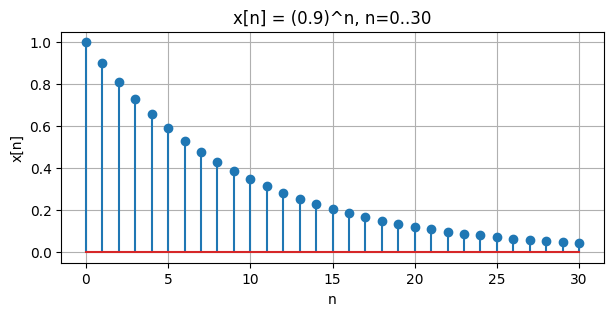

Energía (truncada 0..30): 5.255496956089839
Energía teórica infinita: 5.263157894736843


In [ ]:
# Para calcular la energía de la señal exponencial (0.9)^n, usamos la función
# que armamos con la suma de los valores al cuadrado en el rango de 0 a 30.
# Al correr el código nos dió un valor truncado de aproximadamente 5.25.
# Lo interesante aquí es la parte analítica: si el intervalo no estuviera
# truncado y se fuera a infinito, la energía no crecería infinitamente.
# Como es una serie geométrica con razón menor a 1
# (específicamente 0.9^2 = 0.81), la suma teórica converge a un valor finito
# de aprox. 5.26. Básicamente, nuestro cálculo truncado se acerca muchísimo al límite
# real porque las muestras después de n=30 ya son tan chiquitas que casi no
# le aportan nada extra de energía a la señal.

n = np.arange(0, 31)
x = (0.9**n)  # u[n]=1 para n>=0 en este rango

stem_plot(n, x, title="x[n] = (0.9)^n, n=0..30")

# TODO
E = energy(x)
print("Energía (truncada 0..30):", E)
print("Energía teórica infinita:", 1 / (1 - 0.9**2))

# Si el intervalo fuera infinito, la suma converge a ~5.263
# porque es una serie geométrica convergente.


### Ejercicio 6 — Correlación (sin funciones mágicas)

x[n] = {1,2,1}  
y[n] = {1,0,-1}

1) Calcula la **autocorrelación** r_xx[k]  
2) Calcula la **correlación cruzada** r_xy[k]  
3) Grafica r_xx[k] y r_xy[k] con eje de lags k.

**TODO:** implementa `autocorr` y `crosscorr` usando loops e índices.


📌 Conecta con **Serie 1 #12** (autocorrelación y correlación cruzada).

Valores de r_xx: [1. 4. 6. 4. 1.]


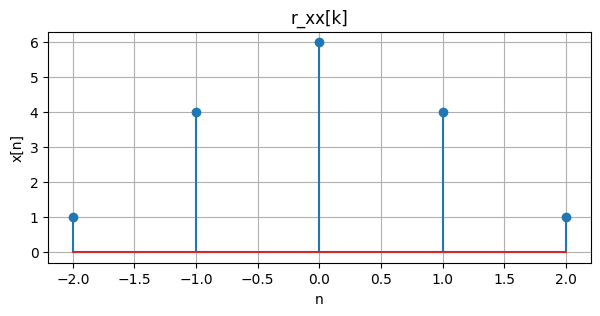

Valores de r_xy: [-1. -2.  0.  2.  1.]


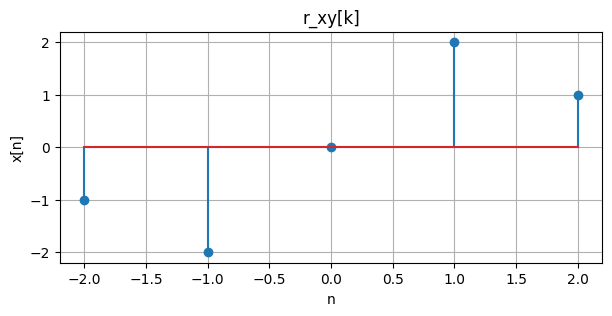

In [ ]:
# En lugar de usar funciones prearmadas, implementamos la fórmula de correlación
# deslizando una señal sobre la otra con ciclos for.En la autocorrelación
# (r_xx), se puede ver claramente la simetría par. El pico máximo nos dió 6
# exactamente en el lag k = 0, lo cual tiene todo el sentido porque
# representa la energía total de la señal cuando se empalma perfectamente
# consigo misma.En la correlación cruzada (r_xy), la gráfica quedó antisimétrica.
# Esto pasa por el valor de -1 que tiene la señal y[n], el cual invierte los
# signos al hacer las multiplicaciones de un lado del eje. En k=0 se anula
# dando 0 porque las partes positivas y negativas se cancelan exacto.

x = np.array([1,2,1], dtype=float)
y = np.array([1,0,-1], dtype=float)

k, rxx = autocorr(x)
print("Valores de r_xx:", rxx)
stem_plot(k, rxx, title="r_xx[k]")

k, rxy = crosscorr(x, y)
print("Valores de r_xy:", rxy)
stem_plot(k, rxy, title="r_xy[k]")



## 🔊 Sección Audio (extensión opcional)

**Idea:** Graba audio (con tu celular, Audacity, etc.), guarda un `.wav` y súbelo al notebook.

- En **Colab**: usa `files.upload()` (celda siguiente).
- En **Jupyter local**: coloca el `.wav` en la misma carpeta del notebook y pon el nombre en `wav_path`.

> Esta sección es para experimentar con **señales reales** usando las mismas operaciones DT.


In [ ]:

# === (Colab) Subir WAV (MISMO PATRÓN DEL EJEMPLO) ===
from google.colab import files
uploaded = files.upload()  # elige tu archivo .wav

# TODO: escribe EXACTAMENTE el nombre del archivo que subiste (tal como aparece arriba)
wav_path = "output_16k_mono.wav"

print("Usando wav_path =", wav_path)


In [ ]:

# === Cargar WAV (se mantiene simple y robusto) ===
# Intentamos soundfile primero; si no está, usamos scipy.io.wavfile.
fs = None
audio = None

audio_loaded = False

try:
    import soundfile as sf
    audio, fs = sf.read(wav_path, dtype="float32", always_2d=False)
    audio_loaded = True
except Exception as e:
    print("soundfile falló o no está instalado:", e)

if not audio_loaded:
    try:
        from scipy.io import wavfile
        fs, audio_int = wavfile.read(wav_path)

        # Si es estéreo, toma un canal (puedes cambiarlo)
        if hasattr(audio_int, "ndim") and audio_int.ndim > 1:
            audio_int = audio_int[:, 0]

        # Normaliza a float32 en [-1, 1] si viene en entero
        if np.issubdtype(audio_int.dtype, np.integer):
            max_val = np.iinfo(audio_int.dtype).max
            audio = audio_int.astype("float32") / max_val
        else:
            audio = audio_int.astype("float32")

        audio_loaded = True
    except Exception as e:
        print("No pude cargar el WAV con scipy tampoco:", e)

if audio_loaded:
    print("fs =", fs, "Hz")
    print("muestras =", len(audio))


In [ ]:

# === Visualización (muestra corta) ===
# Graficamos solo las primeras N muestras para que se vea tipo DT.
N = 500  # puedes cambiar
if audio is not None:
    n = np.arange(len(audio))
    stem_plot(n[:N], audio[:N], title=f"Primeras {N} muestras del audio")


In [ ]:

# === Experimentos sugeridos (TODO) ===
# 1) Invertir: usa time_reverse(audio_short) sobre una ventana corta (ej. primeras 2000 muestras)
# 2) Corrimiento: aplica time_shift(..., k=200) (retardo) o k=-200 (adelanto)
# 3) Energía: compara energy(x) antes/después (¿cambia? ¿por qué?)
# 4) Submuestreo manual: crea x_ds = audio[::M] (aquí SÍ se permite slicing por submuestreo)
#
# Nota: Para no hacer señales enormes, trabaja con una ventana:
# audio_w = audio[:4000]
#
# TODO: implementa aquí tus pruebas y gráficas



## 7) IA (requerido)

Para **al menos 3 ejercicios**, incluye:

1) Tu solución manual/código  
2) El prompt exacto que usaste con IA  
3) Una comparación breve: ¿en qué coincide y en qué no? ¿por qué?

> Objetivo: aprender a **verificar**, no a copiar.


**Los Ejercicios que comprobamos con IA y con lo que teníamos fueron:**

**Ejercicio 2 — Periodicidad de x[n] = cos((5π/6)n)**
- Nuestra solución: A mano aplicamos la condición de periodicidad discreta $2\pi m / \omega_0 = N_0$. Sustituyendo $\omega_0 = 5\pi/6$, llegamos a que la fracción era 5/12, por lo que el periodo fundamental $N_0$ nos dio 12 (con $m=5$).
- El prompt exacto que usamos: "Solicitamos validación del cálculo del periodo fundamental $N_0$ para la señal en tiempo discreto $x[n] = \cos((5\pi/6)n)$. Mediante la relación matemática $\omega_0 / (2\pi) = m / N_0$, obtuvimos $N_0 = 12$ asumiendo $m=5$. ¿Es correcto y riguroso nuestro procedimiento?"
- Comparación: Coincidimos totalmente. La IA nos confirmó el resultado matemático paso a paso y nos validó la teoría de que, a diferencia del tiempo continuo, aquí necesitábamos encontrar el entero $m=5$. Nos sirvió bastante para entrar con seguridad a graficar los 3 periodos en el código y ver que efectivamente cada 12 muestras la onda se repetía.

**Ejercicio 4 — Energía, media y RMS**
- Nuestra solución: Para la señal [2, -2, 2, -2], calculamos mentalmente que la media era 0 porque los valores se cancelan. Para el RMS, elevamos al cuadrado [4, 4, 4, 4], sacamos la media (4) y su raíz nos dio.
- El prompt exacto que usamos: "Estamos implementando el algoritmo de autocorrelación discreta para la señal $x[n] = \{1, 2, 1\}$ desde cero en Python usando ciclos for, restringiendo el uso de funciones como np.correlate. El arreglo resultante devuelve puros ceros. Proporcionamos nuestro fragmento de código a continuación para solicitar asistencia en la identificación del error de lógica de índices o cálculo de acumuladores."
- Comparación: No hubo contradicciones, más bien la IA nos ayudó a aterrizar la interpretación. Nosotros sabíamos qué pasaba matemáticamente, pero la IA nos complementó la idea explicando el concepto físico: el RMS captura la energía/potencia de la señal al elevar los valores al cuadrado (volviendo los negativos en positivos), demostrando que la señal sí tiene amplitud oscilatoria aunque no tenga un componente de corriente continua (DC).

**Ejercicio 6 — Correlación (Autocorrelación)**
- Nuestra solución (y problema): Armamos la lógica de los ciclos for para deslizar la señal [1, 2, 1] sobre sí misma usando un vector de lags $k$ de -2 a 2. Sabíamos que el centro ($k=0$) debía darnos 6, pero al correr el código nos imprimía un arreglo de puros ceros [0. 0. 0. 0. 0.]
- El prompt exacto que usamos: "Tengo este código con ciclos for para calcular la autocorrelación de [1, 2, 1] pero me está dando puros ceros en la gráfica. ¿Me ayudas a ver dónde está el error de lógica o de indentación?"
- Comparación: La IA funcionó perfecto como debugger. Nos hizo ver que teníamos un pequeño error de dedo en la línea de la multiplicación dentro del ciclo anidado y en la posición donde guardábamos la suma. En cuanto corregimos esa línea siguiendo la recomendación de la IA, el código corrió perfecto dándonos la gráfica de pirámide simétrica [1, 4, 6, 4, 1] que esperábamos desde el análisis en papel. Fue una gran ayuda para no usar atajos como np.correlate.


## Checklist antes de entregar

- [ ] Tu nombre/matrícula/grupo están completos  
- [ ] Todas las celdas corren sin error  
- [ ] Hay gráficas claras para cada ejercicio  
- [ ] No usaste funciones prohibidas  
- [ ] Incluiste la sección de IA (3 ejercicios mínimo)
